In [2]:
import networkx as nx
from networkx.algorithms import community
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from scipy.io import mmread

In [39]:
G_fb_food = nx.read_edgelist('empirical_networks/fb-pages-food/fb-pages-food.edges', delimiter=',')
G_fb_food.remove_edges_from(nx.selfloop_edges(G_fb_food))
matrix_bio_celegans = mmread('empirical_networks/bio-celegans/bio-celegans.mtx')
G_bio_celegans = nx.from_scipy_sparse_array(matrix_bio_celegans)
G_bio_CE_GT = nx.read_edgelist('empirical_networks/bio-CE-GT/bio-CE-GT.edges', data=False)
matrix_rt_retweet = mmread('empirical_networks/rt-retweet/rt-retweet.mtx')
G_rt_retweet = nx.from_scipy_sparse_array(matrix_rt_retweet)
matrix_USAir = mmread('empirical_networks/inf-USAir97/inf-USAir97.mtx')
G_USAir = nx.from_scipy_sparse_array(matrix_USAir)
G_web_wisconsin = nx.read_edgelist('empirical_networks/webkb_wisconsin_link1.csv/edges.csv', delimiter=',', data=False)
G_web_wisconsin.remove_edges_from(nx.selfloop_edges(G_web_wisconsin))

print(len(G_web_wisconsin.nodes()))

300


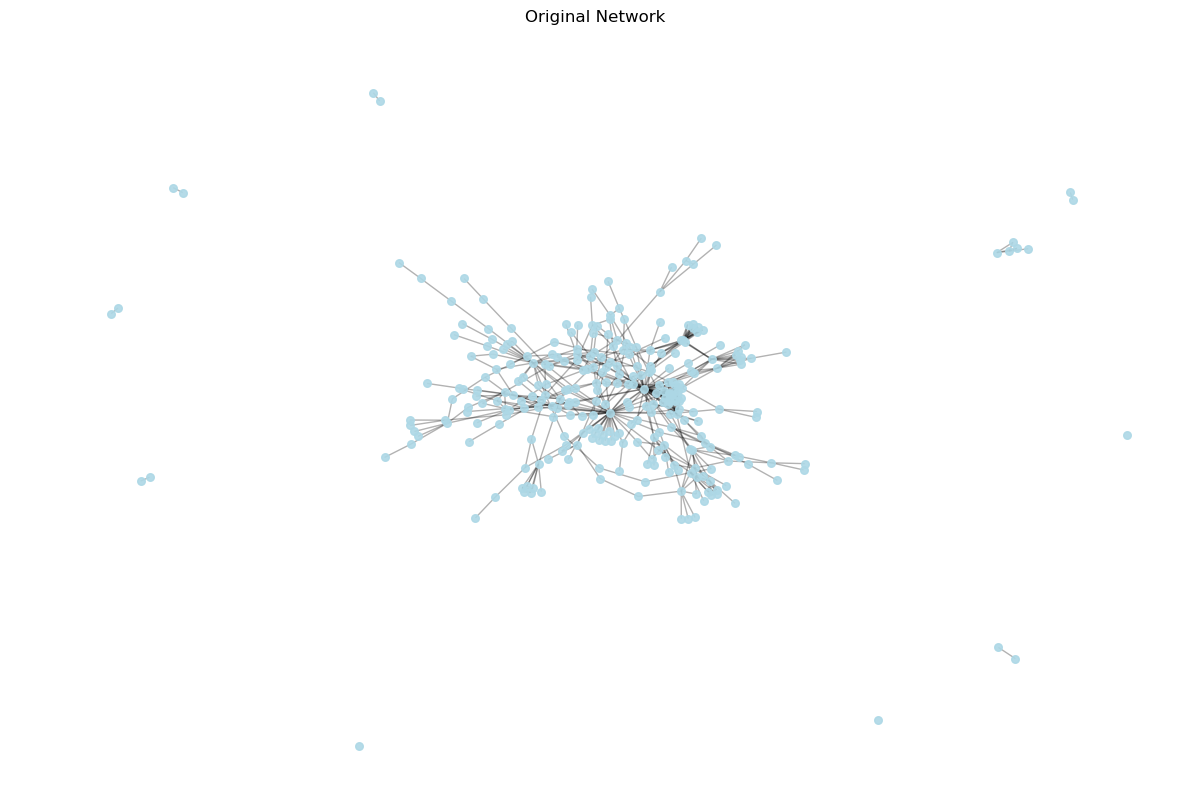

In [40]:
def plot_network(G,name='Original Network'):
    plt.figure(figsize=(12, 8))

    pos = nx.spring_layout(G, seed=42)

    nx.draw_networkx_nodes(G, pos, node_color='lightblue',node_size=30, alpha=0.9)
    nx.draw_networkx_edges(G, pos, alpha=0.3)
    

    plt.title(name)
    plt.axis('off')
    plt.tight_layout()


plot_network(G_web_wisconsin)

In [33]:
def find_best_modularity(G):

    communities_generator = community.girvan_newman(G)

    best_mod = -1
    best_comm = None

    for comms in communities_generator:
        mod = community.modularity(G, comms)
        if mod > best_mod:
            best_mod = mod
            best_comm = comms

    return best_comm, best_mod


comms, mod = find_best_modularity(G_bio_CE_GT)

print(f"Modularity: {mod}")

Modularity: 0.587443181715281


({'4', '3', '796', '1', '509', '654', '0', '655', '2', '653', '652', '832'}, {'272', '499', '271', '211', '759', '6', '493', '762', '13', '634', '5', '641', '543', '471', '14', '542', '8', '802', '774', '643', '265', '274', '640', '645', '903', '500', '673', '214', '831', '10', '11', '414', '644'}, {'281', '270', '283', '331', '276', '713', '354', '224', '766', '236', '388', '175', '897', '496', '275', '789', '103', '707', '914', '210', '303', '492', '389', '215', '308', '384', '310', '118', '755', '412', '340', '495', '27', '622', '304', '378', '287', '102', '435', '145', '486', '212', '238', '383', '277', '309', '714', '380', '24', '395', '491', '314', '216', '858', '488', '28', '379', '302', '247', '346', '822', '101', '315', '646', '328', '393', '295', '330', '750', '918', '482', '497', '505', '799', '50', '598', '489', '381', '26', '710', '633', '213', '217', '252', '398', '571', '325', '829', '104', '562', '306', '845', '868', '209', '313', '757', '337', '716', '438', '392', '382

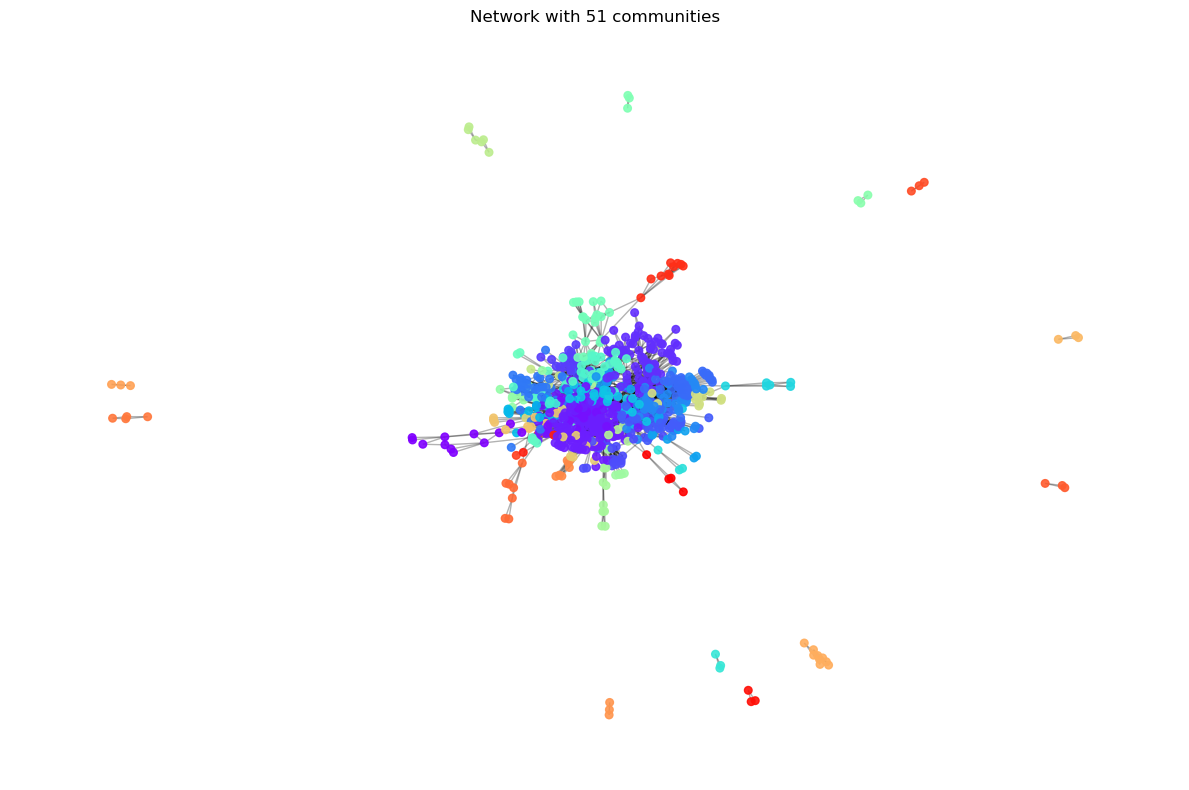

In [41]:
def plot_communities(G,comms):

    comms_list = list(comms)
    node_colors = {}
    colors = cm.rainbow(np.linspace(0, 1, len(comms_list)))

    for i, comm in enumerate(comms_list):
        for node in comm:
            node_colors[node] = colors[i]


    color_list = [node_colors[node] for node in G.nodes()]

    pos = nx.spring_layout(G, seed=42)

    plt.figure(figsize=(12, 8))

    nx.draw_networkx_nodes(G, pos, node_color=color_list,node_size=30, alpha=0.9)
    nx.draw_networkx_edges(G, pos, alpha=0.3)
    plt.title(f"Network with {len(comms)} communities")
    plt.axis('off')
    plt.tight_layout()


plot_communities(G_bio_CE_GT, comms)
print(comms)

In [35]:
def plot_modularity(G):
    communities_generator = community.girvan_newman(G)

    mod_list = []
    comms_list = []

    for comms in communities_generator:
        mod = community.modularity(G, comms)
        mod_list.append(mod)
        comms_list.append(len(comms))

    plt.figure(figsize=(12, 8))
    plt.plot(comms_list, mod_list)
    plt.xlabel("Communities")
    plt.ylabel("Modularity")
    plt.tight_layout()

plot_modularity(G_bio_CE_GT)

KeyboardInterrupt: 